## Daily Code Workout Day 1(220424)
1. Monty Hall Problem

#### 00. Packages Used

In [1]:
import pandas as pd
import numpy as np
import random

#### 01.  Randomized Answers

In [2]:
door_num = [1, 2, 3]
sim_df = pd.DataFrame([random.choice(door_num) for x in range(1000)], columns = ["answer"])

#### 02. First Guesses & Opening One of the Wrong Doors

In [3]:
sim_df['first_g'] = pd.Series([random.choice(door_num) for x in range(1000)])
sim_df['open'] = sim_df.apply(lambda x: random.choice([y for y in door_num if 
                                                       y not in [x['first_g'], x['answer']]]), axis = 1)

#### 03. Shift Vs. Stay

In [4]:
sim_df['Shift'] = sim_df.apply(lambda x: [y for y in door_num if 
                                          y not in [x['first_g'], x['open']]][0], axis = 1)
sim_df['Stay'] = sim_df['first_g']

In [5]:
print("Shifting WR :", sim_df[sim_df['Shift'] == sim_df['answer']].shape[0]/1000*100, "%")
print("Staying WR :", sim_df[sim_df['Stay'] == sim_df['answer']].shape[0]/1000*100, "%")

Shifting WR : 67.5 %
Staying WR : 32.5 %


#### 04. Function

In [6]:
def MH_sim(num = 1000):
    door_num = [1, 2, 3]
    sim_df = pd.DataFrame([random.choice(door_num) for x in range(num)], columns = ["answer"])
    sim_df['first_g'] = pd.Series([random.choice(door_num) for x in range(num)])
    sim_df['open'] = sim_df.apply(lambda x: random.choice([y for y in door_num if 
                                                           y not in [x['first_g'], x['answer']]]), axis = 1)
    sim_df['Shift'] = sim_df.apply(lambda x: [y for y in door_num if 
                                          y not in [x['first_g'], x['open']]][0], axis = 1)
    sim_df['Stay'] = sim_df['first_g']
    return({"Shift": round(sim_df[sim_df['Shift'] == sim_df['answer']].shape[0]/num*100, 2),
            "Stay":round(sim_df[sim_df['Stay'] == sim_df['answer']].shape[0]/num*100, 2)})

#### 05. Simulation (n = 1000)

In [7]:
%%time
sim_rec = pd.DataFrame([MH_sim(num = 1000) for x in range(1000)])

Wall time: 1min 29s


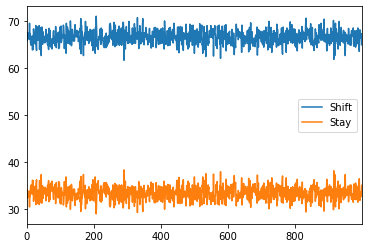

In [9]:
sim_rec.plot()